# Notebook 28 - Format Results for Thesis Appendix

This notebook prepares final results for inclusion in the thesis appendix and results chapter. It generates clean LaTeX, CSV, and image-formatted versions of the store deployment summary.

These outputs are intended for:

- The main results tables in the thesis (LaTeX-ready)
- Visual presentation in reports or slides (PNG export)
- Reproducibility and data transparency (CSV export)

## Objectives

- Load store-level deployment summary
- Format it for LaTeX inclusion (rounded values, bold headers)
- Save a clean CSV and PNG version of the results table
- Highlight top-performing stores by waste value avoided

## Inputs

- `deployment_exports/store_deployment_summary.csv`

## Outputs

- `thesis_outputs/store_summary_table.csv`
- `thesis_outputs/store_summary_table.tex`
- `thesis_outputs/store_summary_table.png`


In [2]:
import os
import pandas as pd

# Define input/output paths
summary_file = os.path.join("deployment_exports", "store_deployment_summary.csv")
output_folder = "thesis_outputs"
os.makedirs(output_folder, exist_ok=True)

# Load store deployment summary
df = pd.read_csv(summary_file)

# Preview
print("Deployment summary loaded:", df.shape)
display(df.head())


Deployment summary loaded: (9, 5)


,store,recipes_planned,unique_ingredients,products_to_pick,estimated_value_saved
0,1024,1,0,0,0.79
1,1058,1,0,0,0.00
2,1160,1,0,0,0.00
3,3298,1,0,0,0.00
4,3345,1,0,0,0.00


In [3]:
# Round and rename for thesis
df_export = df.copy()
df_export["estimated_value_saved"] = df_export["estimated_value_saved"].round(2)
df_export.columns = [
    "Store ID", "Recipes Planned", "Unique Ingredients",
    "Products to Pick", "Estimated € Saved"
]

# Save CSV
csv_path = os.path.join(output_folder, "store_summary_table.csv")
df_export.to_csv(csv_path, index=False)

# Save LaTeX
latex_path = os.path.join(output_folder, "store_summary_table.tex")
with open(latex_path, "w", encoding="utf-8") as f:
    f.write(df_export.to_latex(index=False, bold_rows=True, float_format="%.2f"))

print("Saved CSV to:", csv_path)
print("Saved LaTeX to:", latex_path)


Saved CSV to: thesis_outputs\store_summary_table.csv
Saved LaTeX to: thesis_outputs\store_summary_table.tex


In [4]:
# Add performance tier
def tier(value):
    if value >= 0.75:
        return "high"
    elif value >= 0.25:
        return "moderate"
    else:
        return "low"

df["performance_tier"] = df["estimated_value_saved"].apply(tier)

# Add value-based efficiency metrics
df["value_per_recipe"] = df["estimated_value_saved"] / df["recipes_planned"].replace(0, 1)
df["value_per_product"] = df["estimated_value_saved"] / df["products_to_pick"].replace(0, 1)
df["coverage_score"] = df["estimated_value_saved"] / (
    df["recipes_planned"].replace(0, 1) * df["products_to_pick"].replace(0, 1)
)


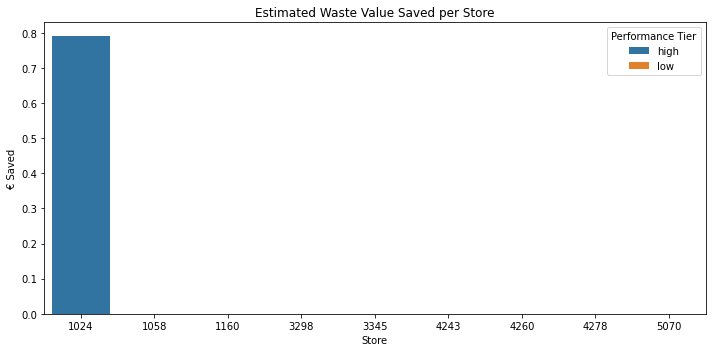

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=df.sort_values("estimated_value_saved", ascending=False), 
            x="store", y="estimated_value_saved", hue="performance_tier", dodge=False)
plt.title("Estimated Waste Value Saved per Store")
plt.xlabel("Store")
plt.ylabel("€ Saved")
plt.legend(title="Performance Tier")
plt.tight_layout()
plt.savefig("thesis_outputs/store_value_saved_by_tier.png", dpi=300)
plt.show()


In [6]:
df = df.round(2)
df.to_csv("thesis_outputs/store_summary_table_enhanced.csv", index=False)
df.to_latex("thesis_outputs/store_summary_table_enhanced.tex", index=False, bold_rows=True, float_format="%.2f")
